# **Algorithm Design, Implementation, and Performance Analysis**

## **1. Algorithm Design and Implementation**

### **1.1 Naive Polynomial Evaluation**

Naive polynomial evaluation computes the value of a polynomial at a given point by directly substituting the value into the polynomial and calculating each term separately. For a polynomial of degree n, this approach requires evaluating each power of the variable and multiplying it by the corresponding coefficient, then summing all terms. This method is straightforward but can be inefficient for high-degree polynomials due to repeated calculations of powers.

For simplicity, we represent $P_n(x)=a_0+a_1x+a_2x^2+\dots+a_nx^n$

#### **1.1.1 Algorithm Design**

In [12]:
def naive_evaluation(coef, x):
	
	degree = len(coef) - 1 # Calculate the degree of the polynomial (highest power)
	result = 0 # Initialize the result accumulator
	
	# Loop through each coefficient and corresponding power of x
	for i in range(degree + 1):
		result += coef[i] * (x ** i) # Multiply the coefficient by x raised to the current power and add to result
	
	return result # Return the final evaluated value

#### **1.1.2 Functionality Demonstration with a Random List of Coefficients**

We will demonstrate the functionality of the `naive_evaluation` algorithm by applying it to a randomly generated list of coefficients. The random list of coefficients is displayed as $[a_0, a_1, \dots, a_n]$, and the evaluation is shown afterward.

In [13]:
import random

coef = [random.randint(-5, 5) for _ in range(6)]
x = 3
print(f'Polynomial coefficients: {coef}')
print(f'P({x}) = {naive_evaluation(coef, x)}')

Polynomial coefficients: [-3, 3, -4, 0, -3, 4]
P(3) = 699


### **1.2 Horner's Rule**

Horner's Rule is an efficient algorithm for evaluating polynomials. Instead of computing each term's power separately, it rewrites the polynomial in a nested form to minimize the number of multiplications. For a polynomial $P_n(x) = a_0 + a_1x + a_2x^2 + \dots + a_nx^n$, Horner's Rule expresses it as $P_n(x) = a_0 + x(a_1 + x(a_2 + \dots + x(a_{n-1} + x a_n)))$. This approach reduces computational complexity and improves numerical stability.

#### **1.2.1 Algorithm Design**

In [14]:
def horner_rule(coef, x):
	degree = len(coef) - 1 # Calculate the degree of the polynomial (highest power)
	result = 0 # Initialize the result accumulator
	
	# Loop through the coefficients in reverse order (from highest degree to lowest)
	for i in range(degree, -1, -1):
		result = result * x + coef[i] # Multiply the current result by x and add the current coefficient
	
	return result # Return the final evaluated value

#### **1.2.2 Functionality Demonstration with a Random List of Coefficients**

We will demonstrate the functionality of the `horner_rule` algorithm by applying it to a randomly generated list of coefficients. The random list of coefficients is displayed as $[a_0, a_1, \dots, a_n]$, and the evaluation is shown afterward.

In [15]:
import random

coef = [random.randint(-5, 5) for _ in range(6)]
x = 3
print(f'Polynomial coefficients: {coef}')
print(f'P({x}) = {horner_rule(coef, x)}')

Polynomial coefficients: [-2, 1, -4, -4, 1, -2]
P(3) = -548


### **1.3 Validation of Correctness**

We will validate the correctness of `naive_evaluation` and `horner_rule` algorithms by comparing the equality of their results.

In [16]:
import random

m = 1000  # Number of test cases to run
test = True  # Flag to track if all tests pass

# Loop over polynomial degrees from 1 to m
for degree in range(1, m + 1):
    x = random.randint(-10, 10)  # Randomly select a value for x in the range [-10, 10]
    # Generate a random list of coefficients for a polynomial of degree n
    coef = [random.randint(-degree, degree) for _ in range(degree + 1)]
    # Compare the results of naive_evaluation and horner_rule
    if naive_evaluation(coef, x) != horner_rule(coef, x):
        print('Both algorithms do not give the same result')  # Print message if results differ
        test = False  # Set flag to False if a mismatch is found
        break  # Exit the loop on first failure

# If all tests pass, print confirmation message
if test:
    print('Both algorithms give the same result')

Both algorithms give the same result


## **2. Experiment Block: Performance Comparison**
### **2.1 Importing Libraries and Setting Up Paths**

In [17]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Performance Measurement and Visualization**

In [18]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start


# Function that compares execution time
def comparison_machine(degrees, reps, algorithm):
	# Initialize a list to store total execution times for each algorithm
	total_time = [[] for _ in algorithm]
	
	# Loop through each degree in the list of degrees
	for degree in degrees:
		# Initialize a list to store the cumulative execution time for each algorithm
		cumulative_time = [0 for _ in algorithm]
		
		# Repeat the experiment 'reps' times for each size
		for _ in range(reps):
			# Generate a sample list of coefficients for the polynomial of the current degree
			coefficients = [random.randint(-degree, degree) for _ in range(degree + 1)]

			# Generate a random value for x in the range [-10, 10]
			x = random.randint(-10, 10)
			
			# Loop through each algorithm and measure its execution time
			for i, algo in enumerate(algorithm):
				# Measure the execution time of the algorithm and add it to the cumulative time
				cumulative_time[i] += execution_time(algo, coefficients, x)
		
		# Calculate the average execution time for each algorithm and append it to total_times
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)
	
	# Return the list of average execution times for each algorithm
	return total_time


# Function that plots the results
def comparison_graph(degrees, t, algorithm):
	# Create the plot
	for i, algo in enumerate(algorithm):
		# Plot the execution times for each algorithm
		plt.plot(degrees, t[i], label=algo.__name__)
	
	# Plot features
	plt.title(f'Comparison plot') # Title
	plt.xlabel("Degree (n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder
	filename = os.path.join(img_path, f"comparison.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()


# Function that calls all the machinery
def machine_call(degrees, reps, algorithm):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(degrees, reps, algorithm)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(degrees, t, algorithm)

### **2.3 Algorithms comparison**

This part sets up and runs a performance comparison between the naive polynomial evaluation and Horner's rule. It defines the sample sizes (degrees), number of repetitions, and the algorithms to compare. Then, it calls the `machine_call` function to measure execution times for each algorithm across different polynomial degrees, generates a comparison plot, and saves the result.

Graph saved to: ..\img\comparison.png


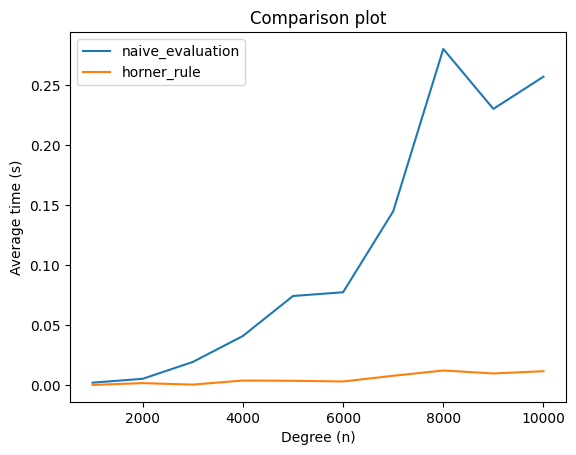

In [19]:
samples = 10  # Number of sample points (input degrees) to test
step_size = 1000  # Step size for generating input sizes
degrees = [i * step_size for i in range(1, samples + 1)]  # List of input degrees to test

reps = 10  # Number of repetitions for each input degree to calculate average execution time

algorithm = [naive_evaluation, horner_rule]  # List of algorithms to compare

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(degrees, reps, algorithm)

The performance comparison plot demonstrates that Horner's rule consistently outperforms the naive polynomial evaluation method as the degree of the polynomial increases. While both algorithms produce correct results, Horner's rule is significantly more efficient, exhibiting much lower execution times for high-degree polynomials. This highlights the importance of algorithmic optimization in computational mathematics, especially for large-scale problems.

# **Conclusion**

In this notebook, we explored and compared two algorithms for polynomial evaluation: the naive approach and Horner's rule. Through both correctness validation and extensive performance experiments, we demonstrated that while both methods yield the same results, Horner's rule is significantly more efficient, especially for polynomials of high degree. The performance plots clearly show that Horner's rule scales much better as the polynomial degree increases, highlighting the importance of algorithmic optimization in computational mathematics. This study underscores the value of choosing efficient algorithms to handle large-scale problems, ensuring both accuracy and computational feasibility.